## Grover's Algorithm
Grover’s algorithm is ideal for searching an unstructured database. While a classical computer would require 𝑂(𝑁) operations to find the item, Grover's Algorithm can do it in O(√N) operations offering a quadratic speedup.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to create the oracle for Grover's Algorithm
def grover_oracle(qc):
    qc.cz(0, 1)

qc = QuantumCircuit(2, 2) # Create a Quantum Circuit with 2 qubits and 2 classical bits
qc.h([0, 1]) # Apply Hadamard gates to put qubits into superposition
grover_oracle(qc) # Apply the Grover oracle
qc.h([0, 1]) # Apply Hadamard gates again
qc.measure([0, 1], [0, 1]) # Measure the qubits

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

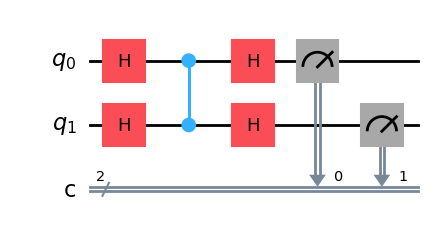

In [3]:
#Visualise the circuit
qc.draw('mpl')

Counts: {'11': 274, '10': 250, '01': 256, '00': 244}


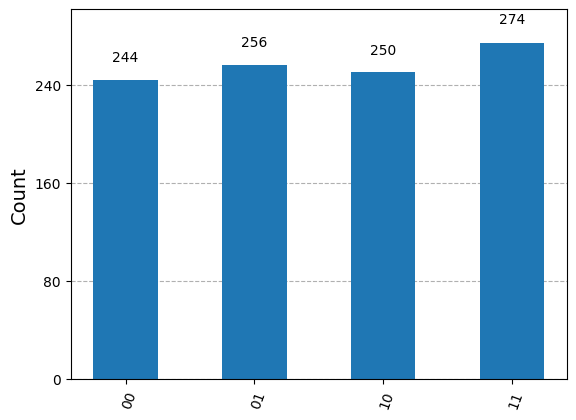

In [4]:
counts = result.get_counts() # Get the counts of outcomes
print("Counts:", counts)
# Visualize the results
plot_histogram(counts)